In [35]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

# Creation Linear regression with pytorch
Using **datasets.make_regression** as dataset

epoch: 10, loss: 4391.4785
epoch: 20, loss: 3278.4529
epoch: 30, loss: 2472.4248
epoch: 40, loss: 1888.1310
epoch: 50, loss: 1464.1804
epoch: 60, loss: 1156.3081
epoch: 70, loss: 932.5542
epoch: 80, loss: 769.8176
epoch: 90, loss: 651.3799
epoch: 100, loss: 565.1294


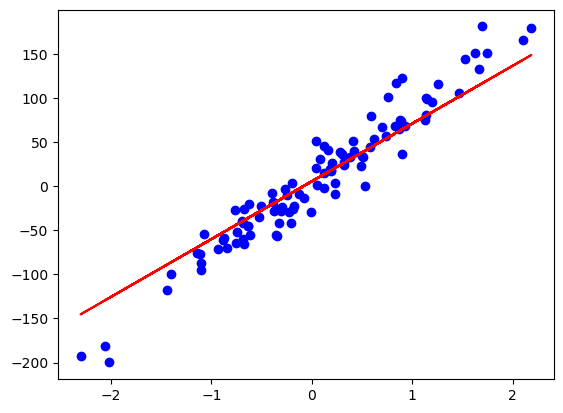

In [36]:
# Preparing data
X_numpy,y_numpy = datasets.make_regression(n_samples=100, n_features=1,noise=20, random_state=1) #Noise: Generan datos realistas
#random_state 
df = pd.DataFrame(data = X_numpy, columns=['ok'])
df['vale'] = y_numpy
#print(df.head(100))

'''print(help(torch.from_numpy))'''
#TODO: Pasar de numpy a torch
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
# TODO: RECORDAR QUE ES NECESARIO AJUSTAR PARA  QUE SE DEN BUENOS LOSS FUNCTION

n_samples, n_features = X.shape
#print(help(nn.Linear))


# 1. Modelo
#todo: Input, ouout, model, size, forward pass
inputs_size = n_features
output_size = 1
model = nn.Linear(inputs_size, output_size)


#Loss and optimizer
learning_rate = 0.01
loss = nn.MSELoss() # TODO: Error cuadratico medio
optim = torch.optim.SGD(model.parameters(), lr = learning_rate)
#linear = nn.Linear

## Training loop
n_iters = 100
for epoch in range(n_iters):
    #Forward pass
    y_predict = model(X)
    
    #Loss
    l = loss(y_predict, y)
    #Backward pass
    l.backward()
    #Update weights
    optim.step()
    #Zero gradients afeter updating
    optim.zero_grad()
    
    
    if (epoch+1)% 10 ==0:
       print(f'epoch: {epoch+1}, loss: {l.item():.4f}')

#Plot:
predicted = model(X).detach().numpy() # Detach para el grafo que se hace Tensor
plt.plot(X_numpy, y_numpy, 'bo', label='Datos originales')
plt.plot(X_numpy, predicted, 'r-', label='Predicciones del modelo')
plt.show()

# Logistical regression

In [37]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [52]:
# 0: Preparing data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
dto = pd.DataFrame(data = X, columns= bc.feature_names)

n_samples, n_features = X.shape
print(n_features)

## b. Crear train daata, y luego escalarla

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

# ESCALAR
sc = StandardScaler()
X_train =sc.fit_transform(X_train) #TODO: Ajusta el escalador a los datos y transforma los datos
X_test = sc.transform(X_test) #Transforma a los datos ajustados del entrenamiento

# PASAR LOS DATOS A TORCH

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


#todo: 1. Modelo
# Como no existe toca hacer la clase vale:

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1) # Numero de caracteristicas de entrada, 1 nodo de salida
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)


# TODO. 2. Loss and optimization
learning_rate = 0.01
loss = nn.BCELoss()
optim = torch.optim.SGD(model.parameters(), lr = learning_rate)


# TODO: 3. Training loop
n_iters = 100

for epoch in range(n_iters):
    # forward pass and loss
    y_predicted = model(X_train)
    l = loss(y_predicted, y_train)
    # backward pass
    l.backward()
    # update
    optim.step()
    # Zero gradients
    optim.zero_grad()
    
    #Epoch
    if (epoch+1)%10 ==0:
        print(f"Epoch : {epoch+1}, loss {l.item():.4f}")
    
    
## TODO 4: Hacer una prueba de accurancy

30
Epoch : 10, loss 0.5021
Epoch : 20, loss 0.4260
Epoch : 30, loss 0.3746
Epoch : 40, loss 0.3374
Epoch : 50, loss 0.3093
Epoch : 60, loss 0.2871
Epoch : 70, loss 0.2692
Epoch : 80, loss 0.2543
Epoch : 90, loss 0.2418
Epoch : 100, loss 0.2310


# Modelos BCE y MSE
## MSE **Mean Squared Error**
Funciona para funciones de _regresión_ donde penaliza los errores más grandes *nn.MSEloss()*

## BCE **Binary Cross-Entropy**
Funciona para _clasificaciones binarias_, penalizando predicciones incorrectas con alta confianza *nn.BCELoss()*

# ACCURANCY:


In [53]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    y_predict = model(X_test)
    y_predict_round = y_predict.round()

# Convertirlos de tensores a numpy:
y_predict_round = y_predict_round.numpy()
y_test_np = y_test.numpy()

accurancy = accuracy_score(y_test_np, y_predict_round)
print(accurancy)

0.9210526315789473
